In [7]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from imagingIO import loopMice, getBeh
from trials import markTrials
from bouts import markBouts, markBoutsDouble
from events import getEvents
from statistics import stdCalc, getStats, getBoutMeans
from analysis import dFFcalc
from statistics import stdCalc

In [2]:
# Start running the analysis
mice = [(8404, 6), (8857, 3), (8864, 1)]
#mice = [(6838, 1), (6874, 1), (7104, 1), (7105, 1)]
behType = 'FR1'

fileList = loopMice(mice, behType)
eventList = getBeh(mice, fileList['Behaviour'], behType)

In [3]:
fs = 0.05
base = 10.0
duration = 30.0
eventType = 'Eat_Start'
trials=[1,12]
fileList['Behaviour']

8404    J:\Hakan Kucukdereli\Miniscope_Behaviour_MPIN\...
8857    J:\Hakan Kucukdereli\Miniscope_Behaviour_MPIN\...
8864    J:\Hakan Kucukdereli\Miniscope_Behaviour_MPIN\...
Name: Behaviour, dtype: object


3  mice were loaded.

Baseline was set -10.0 sec before the event.



3  mice were loaded.
Mouse number 8404  had  15  total rewards.
Mouse number 8857  had  17  total rewards.
Mouse number 8864  had  13  total rewards.


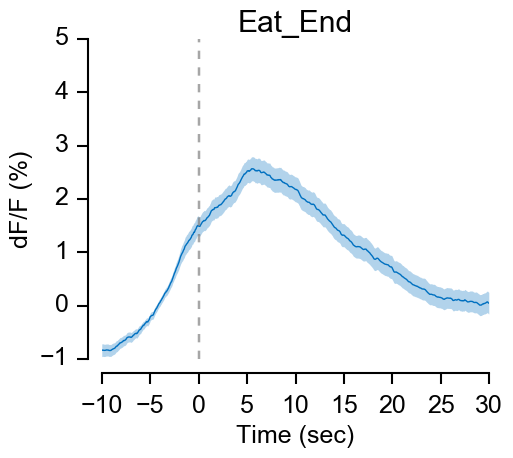

In [ ]:
cellNames = eventsData['Cell'].drop_duplicates().values
row = 4
plt.figure(figsize=(50,40), facecolor="w", dpi= 150)
time = np.arange(-base,duration,fs)
for ind, cell in enumerate(cellNames):
    
    for i in range(1,10):
        plt.style.use('classic')
        # Set the font dictionaries (for plot title and axis titles)
        font = {'sans-serif' : 'Arial',
                'weight' : 'normal',
                'size'   : 18}
        plt.rc('font', **font)
        
        line = 1.5
        colors = ('#BCBEC0', '#0070C0', '#BCBEC0', '#0070C0')
    
        ax = plt.subplot(row, len(cellNames)/row, ind+1)
        
        ## labels
        ax.set_xlabel("Time (sec)")
        ax.set_ylabel("dF/F (%)")
        #ax.set_title("Aligned to event::Update the title", fontsize= 12)

        ## Remove top axes and right axes ticks
        ax.get_xaxis().tick_top()
        ax.get_yaxis().tick_left()
        
        ## Remove top axes and right axes ticks
        ax.get_xaxis().tick_top()
        ax.get_yaxis().tick_left()

        ## adjust the spines and ticks
        ax.spines['right'].set_color('none')
        ax.spines['top'].set_color('none')
        ax.spines['left'].set_linewidth(line)
        ax.spines['left'].set_position(('outward', 10))
        ax.spines['bottom'].set_linewidth(line)
        ax.spines['bottom'].set_position(('outward', 10))
        ax.xaxis.set_ticks_position('bottom')
        ax.yaxis.set_ticks_position('left')

        ## decorate the axes
        ax.tick_params(axis='y', color= '#000000', width= line, direction='out', length= 8, which='major', pad=10)
        ax.tick_params(axis='x', color= '#000000', width= line, direction='out', length= 8, which='major', pad=12)
        
        ax.plot([0, 0],[-1, 5], 'gray', linestyle='--', linewidth=line*1.2, alpha=0.7)
        
        df=eventsData.pivot_table(index=['Cell','Event'], columns='New_Time')
        df.loc[cell,i].plot(legend=False, subplots=True)
        

In [ ]:
cellNames = eventsData['Cell'].drop_duplicates().values
time = np.arange(-base,duration,fs)
for ind, cell in enumerate(cellNames):
    for i in range(1,10):       
        df=eventsData.pivot_table(index=['Cell','Event'], columns='New_Time')
        print df.loc[cell,i].mean(axis=0)
        

In [ ]:
statsFR1 = pd.read_csv("J:\\Hakan Kucukdereli\\Miniscope_Behaviour_MPIN\\scripts\\data\\statsFR1.csv", index_col='Cell')
statsFR1

In [ ]:
# Look at single cells and calculate a bunch of stats
# Eat_Start

In [ ]:
mice = [(8404, 6), (8857, 3), (8864, 1)]
behType = 'FR1'
fs = 0.05
base = 10.0
duration = 30.0
eventType = 'Eat_Start'
trials=[1,12]
eventsData = markTrials(mice, base, duration, eventType=eventType, behType=behType, trials=trials, baseline=True)

cellNames = eventsData['Cell'].drop_duplicates().values
time = np.arange(-base,duration,fs)

# Start running the analysis
#fileList = loopMice(mice, behType)
boutMeansFR1 = getBoutMeans(mice, eventType=['Eat_Start', 'Eat_End'], behType=behType, trials=trials, dff=True, baseline=False, base=base)
# Calculate the stats
[statsFR1, percFR1] = getStats(boutMeansFR1, choice='Ranksum', p_val=0.05)

row = 4
fig = plt.figure(figsize=(40,40), facecolor="w", dpi= 150)
for ind, cell in enumerate(cellNames):
    df=eventsData.pivot_table(index=['Cell','Event'], columns='New_Time')
    semCell = df.loc[cell].sem(axis=0)
    meanCell = df.loc[cell].mean(axis=0)
    
    plt.style.use('classic')
    # Set the font dictionaries (for plot title and axis titles)
    font = {'sans-serif' : 'Arial',
            'weight' : 'normal',
            'size'   : 18}
    plt.rc('font', **font)

    line = 1.5
    colors = ('#BCBEC0', '#0070C0', '#BCBEC0', '#0070C0')
    
    ax = plt.subplot(row, len(cellNames)/row, ind+1)
    
    ## labels
    ax.set_xlabel("Time (sec)")
    ax.set_ylabel("dF/F (%)")
    title = "Cell: " + cell + "\n" + "Class: " + statsFR1['Class'].loc[cell]
    ax.set_title(title, fontsize= 12)

    ## Remove top axes and right axes ticks
    ax.get_xaxis().tick_top()
    ax.get_yaxis().tick_left()

    ## adjust the spines and ticks
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.spines['left'].set_linewidth(line)
    ax.spines['left'].set_position(('outward', 10))
    ax.spines['bottom'].set_linewidth(line)
    ax.spines['bottom'].set_position(('outward', 10))
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    ## decorate the axes
    ax.tick_params(axis='y', color= '#000000', width= line, direction='out', length= 8, which='major', pad=10)
    ax.tick_params(axis='x', color= '#000000', width= line, direction='out', length= 8, which='major', pad=12)

    ax.fill_between(time, meanCell+semCell, meanCell-semCell, facecolor=colors[1], linewidth=0, alpha=0.3, zorder=-5)
    cat, = ax.plot(time, meanCell, colors[1], label=eventType)    
    
    # limits
    lims = [-3, 30]
    ax.set_ylim(lims)
    
    ax.plot([0, 0],lims, 'gray', linestyle='--', linewidth=line*1.2, alpha=0.7)
    
fig.savefig("J:\\Hakan Kucukdereli\\Miniscope_Behaviour_MPIN\\scripts\\figures\\eat_start_all_cells_trial_means_10sec.svg")

In [ ]:
statsFR1.to_csv("J:\\Hakan Kucukdereli\\Miniscope_Behaviour_MPIN\\scripts\\figures\\eat_start_abunch_ofstats.csv")

In [ ]:
plt.style.use('classic')
# Set the font dictionaries (for plot title and axis titles)
font = {'sans-serif' : 'Arial',
        'weight' : 'normal',
        'size'   : 18}
plt.rc('font', **font)

line = 1.5

fig = plt.figure(figsize=(5,5), facecolor="w", dpi= 150)
ax = plt.subplot(111)
percFR1.T.plot.pie(ax=ax, y='Percentage (%)', autopct='%1.1f%%', explode=[.03,.03,.03], startangle=0, fontsize=17, legend=False, cmap=plt.cm.PiYG_r)
wedges = [patch for patch in ax.patches if isinstance(patch, mpatches.Wedge)]
for w in wedges:
    w.set_linewidth(line)
    w.set_edgecolor('w')
    
fig.savefig("J:\\Hakan Kucukdereli\\Miniscope_Behaviour_MPIN\\scripts\\figures\\eat_start_up_down_all_around.svg")

In [ ]:
# Look at single cells and calculate a bunch of stats
# Eat_End

In [ ]:
mice = [(8404, 6), (8857, 3), (8864, 1)]
behType = 'FR1'
fs = 0.05
base = 10.0
duration = 30.0
#eventType = 'Eat_Start'
trials=[1,12]

fileList = loopMice(mice, behType)
eventList = getBeh(mice, fileList['Behaviour'], behType)
eventStart = getEvents(mice, eventList, eventType='Eat_Start', trials=[1,12])


In [ ]:
eventStart 


In [ ]:
df=eventsData.pivot_table(index=['Cell','Event'], columns='New_Time')

In [ ]:
for cell in cellNames:
    plt.figure(figsize=(5,4), facecolor="w", dpi= 150)
    #ax = plt.subplot(111)
    for i in range(1,10):
        df=eventsData.pivot_table(index=['Cell','Event'], columns='New_Time')
        df.loc[cell,i].plot(legend=False)

In [ ]:
str(len(eventsData.pivot_table(index=['Cell'], columns='New_Time').index)) + " cells in total."

In [ ]:
startData = markTrials(mice, base, duration, eventType='Eating_Start', trials=trials, baseline=5.0)
contactData = markTrials(mice, base, duration, eventType='Food_Contact', trials=trials, baseline=5.0)

# Calculate the mean and sem
meanstart=startData.pivot_table(index=['Event', 'Cell'], columns='New_Time').mean()
semstart=startData.pivot_table(index=['Event', 'Cell'], columns='New_Time').sem()

meancontact=contactData.pivot_table(index=['Event', 'Cell'], columns='New_Time').mean()
semcontact=contactData.pivot_table(index=['Event', 'Cell'], columns='New_Time').sem()

time = np.arange(-base,duration,fs)

In [ ]:
fs = 0.05
base = 5.0
duration = 30.0
eventType = 'Right_Poke'
trials=[1,10]

eventsData = markTrials(mice, base, duration, eventType=eventType, behType=behType, trials=trials, baseline=base)

# Calculate the mean and sem
mean=eventsData.pivot_table(index=['Event', 'Cell'], columns='New_Time').mean()
sem=eventsData.pivot_table(index=['Event', 'Cell'], columns='New_Time').sem()
time = np.arange(-base,duration,fs)

plt.style.use('classic')
# Set the font dictionaries (for plot title and axis titles)
font = {'sans-serif' : 'Arial',
        'weight' : 'normal',
        'size'   : 18}
plt.rc('font', **font)

plt.figure(figsize=(5,4), facecolor="w", dpi= 150)
ax = plt.subplot(111)

line = 1.5
colors = ('#BCBEC0', '#0070C0', '#BCBEC0', '#0070C0')

## labels
ax.set_xlabel("Time (sec)")
ax.set_ylabel("dF/F (%)")
#ax.set_title("Aligned to event::Update the title", fontsize= 12)

## Remove top axes and right axes ticks
ax.get_xaxis().tick_top()
ax.get_yaxis().tick_left()

## adjust the spines and ticks
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['left'].set_linewidth(line)
ax.spines['left'].set_position(('outward', 10))
ax.spines['bottom'].set_linewidth(line)
ax.spines['bottom'].set_position(('outward', 10))
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

## decorate the axes
ax.tick_params(axis='y', color= '#000000', width= line, direction='out', length= 8, which='major', pad=10)
ax.tick_params(axis='x', color= '#000000', width= line, direction='out', length= 8, which='major', pad=12)

ax.fill_between(time, mean+sem, mean-sem, facecolor=colors[1], linewidth=0, alpha=0.3, zorder=-5)
cat, = ax.plot(time, mean, colors[1], label=eventType)
#ax.fill_between(time, meanstart+semstart, meanstart-semstart, facecolor=colors[1], linewidth=0, alpha=0.3, zorder=-5)
#cat1, = ax.plot(time, meanstart, colors[1], label='Start')
#ax.fill_between(time, meancontact+semcontact, meancontact-semcontact, facecolor=colors[0], linewidth=0, alpha=0.3, zorder=-5)
#cat2, = ax.plot(time, meancontact, colors[0], label='Contact')

ax.plot([0, 0],[-1, 5], 'gray', linestyle='--', linewidth=line*1.2, alpha=0.7)
#ax.text(0, 5, eventType)
#ax.set_ylim([-1., 5.])

ax.set_title(eventType)

if False:
    ## add the legend
    ax.legend([cat1, cat2], ['Start', 'Contact'])
    handles, labels = ax.get_legend_handles_labels()
    legend = plt.legend(loc= 'upper left', fontsize= 18, handles=handles, handlelength= 1.2, handleheight= 0.8, handletextpad= 0.5, frameon= False)

#plt.tight_layout()

In [ ]:
boutsData = markBouts(mice, eventType=['Eat_Start', 'Eat_End'], behType=behType, trials=[1,12], dff=True, baseline=5.0)

In [ ]:
boutsData = markBouts(mice, eventType=['Eat_Start', 'Eat_End'], behType=behType, trials=[1,12], resample=1000)

In [ ]:
boutsData.pivot_table(index=['Event', 'Cell'], columns='New_Time')

In [ ]:
mean=boutsData.pivot_table(index=['Event', 'Cell'], columns='New_Time').mean()
sem=boutsData.pivot_table(index=['Event', 'Cell'], columns='New_Time').sem()

time = np.arange(-base,duration,fs)
print len(time), len(mean)
plt.plot([0, 0],[-1, 10], 'g--')
plt.fill_between(time, mean+sem, mean-sem, facecolor='gray', linewidth=0, alpha=0.3, zorder=-5)
plt.plot(time, mean)

In [ ]:
heatData = eventsData.pivot_table(index=['Event'], columns='New_Time', aggfunc=np.mean)
heatData['Fluoro'].columns
heatData.mean(axis=1)

In [ ]:
plt.style.use('classic')
# Set the font dictionaries (for plot title and axis titles)
font = {'sans-serif' : 'Arial',
        'weight' : 'normal',
        'size'   : 18}
plt.rc('font', **font)

plt.figure(figsize=(6,5), facecolor="w", dpi= 150)
ax = plt.subplot(111)

line = 1.5
colors = ('#BCBEC0', '#0070C0', '#BCBEC0', '#0070C0')

plt.pcolor(heatData, cmap=plt.cm.PiYG_r, linewidth=line, linestyle='solid')
ax.invert_yaxis()
plt.colorbar()

## labels
ax.set_xlabel('Time (sec)')
ax.set_ylabel('Trial #')
ax.set_title(eventType)


## decorate the axes
#ax.tick_params(axis='y', color= '#000000', width= line, direction='in', length= 4, which='major', pad=10)
#ax.tick_params(axis='x', color= '#000000', width= line, direction='in', length= 4, which='major', pad=12)
time_ax = np.arange(-base, duration+0.001, 5.0)
ax.set_xticks(np.linspace(0, (base+duration)/fs, len(time_ax)))
ax.set_xticklabels(time_ax)
ax.set_yticks(np.linspace(trials[0]-0.5, trials[1]-0.5, 2))
ax.set_yticklabels(np.linspace(trials[0], trials[1], 2, dtype=int))

ax.plot([base/fs, base/fs], list(ax.get_ylim()), 'w', linestyle='--', linewidth=line*1.2, alpha=1., zorder=111)

In [ ]:
for trial in heatData.index.values:
    heatData.loc[trial].plot(legend=False)

In [ ]:
hD.values.std()

In [ ]:
hD = pd.DataFrame(heatData.values, columns=time, index=heatData.index.values)
hDzscore = (hD - hD.values.mean()) / hD.values.std()

ax = plt.subplot(111)
plt.pcolor(hDzscore, cmap=plt.cm.PiYG_r, linewidth=line, linestyle='solid')
ax.invert_yaxis()
plt.colorbar()

In [ ]:
hDzscore.T
#.plot(legend=False)
plt.figure(figsize=(4,5), facecolor="w", dpi= 150)
ax = plt.subplot(111)
for col in hDzscore.T.columns:
    ax.plot(time, hDzscore.T[col]+(1.8*col))

In [ ]:
cellNames = eventsData['Cell'].drop_duplicates().values
time = np.arange(-base,duration,fs)

row = 4
plt.figure(figsize=(50,40), facecolor="w", dpi= 150)
for ind, cell in enumerate(cellNames):
    df=eventsData.pivot_table(index=['Cell','Event'], columns='New_Time')
    
    plt.style.use('classic')
    # Set the font dictionaries (for plot title and axis titles)
    font = {'sans-serif' : 'Arial',
            'weight' : 'normal',
            'size'   : 18}
    plt.rc('font', **font)

    line = 1.5
    colors = ('#BCBEC0', '#0070C0', '#BCBEC0', '#0070C0')
    
    ax = plt.subplot(row, len(cellNames)/row, ind+1)
    
    plt.pcolor(df.loc[cell], cmap=plt.cm.PiYG_r, linewidth=line, linestyle='solid')
    ax.invert_yaxis()
    plt.colorbar()
    
    ## labels
    ax.set_xlabel("Time (sec)")
    ax.set_ylabel("dF/F (%)")
    #ax.set_title("Aligned to event::Update the title", fontsize= 12)

    ## decorate the axes
    time_ax = np.arange(-base, duration+0.001, 5.0)
    ax.set_xticks(np.linspace(0, (base+duration)/fs, len(time_ax)))
    ax.set_xticklabels(time_ax)
    ax.set_yticks(np.linspace(trials[0]-0.5, trials[1]-0.5, 2))
    ax.set_yticklabels(np.linspace(trials[0], trials[1], 2, dtype=int))

    ax.plot([base/fs, base/fs], list(ax.get_ylim()), 'w', linestyle='--', linewidth=line*1.2, alpha=1., zorder=111)
